In [1]:
import numpy as np
import pandas as pd
import psycopg2

### Connect to Postgres DB

In [2]:
import json

with open('config.json') as f:
    conf = json.load(f)
    host = conf['host']
    database = conf['database']
    user = conf['user']
    passw = conf['passw']

In [3]:
conn_str = "host={} dbname={} user={} password={}".format(host, database, user, passw)
conn = psycopg2.connect(conn_str)

### Initial Query

In [ ]:
Vic_Off_query = "SELECT vic.victim_id AS VICTIM_ID,\
            vic.incident_id AS INCIDENT_ID,\
            date_part('year',inc.incident_date),\
            vic.victim_type_id AS VICTIM_TYPE_ID,\
            ty.victim_type_name AS VICTIM_TYPE,\
            vic.age_range_low_num AS AGE_RANGE_LOW,\
            vic.age_range_high_num AS AGE_RANGE_HIGH,\
            vic.sex_code AS VICTIM_SEX,\
            oft.crime_against AS CRIME_AGAINST,\
            oft.offense_name AS OFFENSE,\
            oft.offense_category_name AS OFFENSE_CATEGORY,\
            oft.offense_group AS OFFENSE_GROUP,\
            ofr.offender_id AS OFFENDER_ID,\
            ofr.age_num AS OFFENDER_AGE,\
            ofr.sex_code AS OFFENDER_SEX,\
            off.location_id AS LOCATION_ID,\
            loc.location_name AS LOCATION_NAME,\
            inc.ddocname AS DOC_NAME,\
            ori.fips AS FIPS,\
            ori.countyname AS COUNTY,\
            ori.name AS ORI_NAME,\
            ags.population AS POPULATION,\
            ags.population_group_desc AS POPULATION DESCRIPTION,\
            ags.total_officers AS OFFICERS,\
            ags.total_civilians AS CIVILIANS\
            FROM nibrs_victim as vic\
            JOIN nibrs_victim_type as ty\
            ON vic.victim_type_id = ty.victim_type_id\
            JOIN nibrs_offender as ofr\
            ON ofr.incident_id = vic.incident_id\
            JOIN nibrs_offense as off\
            ON off.incident_id = vic.incident_id\
            JOIN nibrs_offense_type as oft\
            ON oft.offense_type_id = off.offense_type_id\
            JOIN nibrs_location_type as loc\
            ON off.location_id = loc.location_id\
            JOIN nibrs_incident as inc\
            ON inc.incident_id = vic.incident_id\
            JOIN cde_agencies as ags\
            ON ags.agency_id = inc.agency_id\
            JOIN ori_to_fips as ori\
            ON ori.ori9 = ags.ori\
            WHERE vic.victim_type_id = 4;"

### Load into Pandas DataFrame

In [4]:
Vic_Off_df = pd.read_csv('init_query.csv')
Vic_Off_df.head()

victim_id  incident_id  victim_type_id victim_type  age_range_low  \
0   57023969     52643345               4  Individual            NaN   
1   57023969     52643345               4  Individual            NaN   
2   57023969     52643345               4  Individual            NaN   
3   57023969     52643345               4  Individual            NaN   
4   57023969     52643345               4  Individual            NaN   

   age_range_high victim_sex crime_against  \
0             NaN          M      Property   
1             NaN          M      Property   
2             NaN          M      Property   
3             NaN          M      Property   
4             NaN          M      Property   

                                       offense        offense_category  \
0  Theft of Motor Vehicle Parts or Accessories  Larceny/Theft Offenses   
1  Theft of Motor Vehicle Parts or Accessories  Larceny/Theft Offenses   
2  Theft of Motor Vehicle Parts or Accessories  Larceny/Theft Offenses   
3  Theft of Motor Vehicle Parts or Accessories  Larceny/Theft Offenses   
4  Theft of Motor Vehicle Parts or Accessories  Larceny/Theft Offenses   

  offense_group  offender_id  offender_age offender_sex  location_id  \
0             A     59269093           NaN            U           18   
1             A     59269093           NaN            U           18   
2             A     59269093           NaN            U           18   
3             A     59269093           NaN            U           18   
4             A     59269093           NaN            U           18   

             location_name                               ddocname   fips  \
0  Parking/Drop Lot/Garage  2010_07_TX2201200_100074401_INC_NIBRS  48439   
1  Parking/Drop Lot/Garage  2010_07_TX2201200_100074401_INC_NIBRS  48439   
2  Parking/Drop Lot/Garage  2010_07_TX2201200_100074401_INC_NIBRS  48439   
3  Parking/Drop Lot/Garage  2010_07_TX2201200_100074401_INC_NIBRS  48439   
4  Parking/Drop Lot/Garage  2010_07_TX2201200_100074401_INC_NIBRS  48439   

  countyname                          name  
0    TARRANT  FORT WORTH POLICE DEPARTMENT  
1    TARRANT  FORT WORTH POLICE DEPARTMENT  
2    TARRANT  FORT WORTH POLICE DEPARTMENT  
3    TARRANT  FORT WORTH POLICE DEPARTMENT  
4    TARRANT  FORT WORTH POLICE DEPARTMENT

### Count of NaN's by column

In [5]:
Vic_Off_df.isna().sum()

victim_id                 0
incident_id               0
victim_type_id            0
victim_type               0
age_range_low       8332860
age_range_high      8332860
victim_sex                0
crime_against             0
offense                   0
offense_category          0
offense_group             0
offender_id               0
offender_age        4539013
offender_sex        2291595
location_id               0
location_name             0
ddocname                  0
fips                      0
countyname                0
name                      0
dtype: int64

### Impute missing offender_sex as "U" (unknown)

In [6]:
Vic_Off_df.offender_sex.value_counts()

M    4290919
U    1727647
F    1560047
Name: offender_sex, dtype: int64

In [64]:
Vic_Off_df['offender_sex'].fillna('U', inplace=True)

In [65]:
Vic_Off_df.offender_sex.value_counts()

M    4290919
U    4019242
F    1560047
Name: offender_sex, dtype: int64

# Plot number of offenses by offender age

In [61]:
OffAges = pd.value_counts(Vic_Off_df['offender_age'].values, sort=False)
OffAges

2.0        118
3.0         48
4.0        273
5.0        608
6.0        796
7.0       1575
8.0       2689
9.0       5200
10.0     12132
11.0     22713
12.0     43760
13.0     70238
14.0    101877
15.0    138475
16.0    167717
17.0    209290
18.0    224907
19.0    220802
20.0    214282
21.0    212574
22.0    225823
23.0    182973
24.0    179607
25.0    213399
26.0    161633
27.0    177338
28.0    149465
29.0    140668
30.0    167269
31.0    129450
         ...  
69.0      3256
70.0      3296
71.0      2088
72.0      2119
73.0      1858
74.0      1756
75.0      1996
76.0      1210
77.0      1153
78.0       914
79.0       836
80.0       806
81.0       665
82.0       566
83.0       493
84.0       481
85.0       343
86.0       229
87.0       264
88.0       981
89.0       153
90.0       158
91.0        35
92.0        21
93.0        13
94.0        42
95.0        21
96.0        28
98.0        28
1.0      12814
Length: 97, dtype: int64

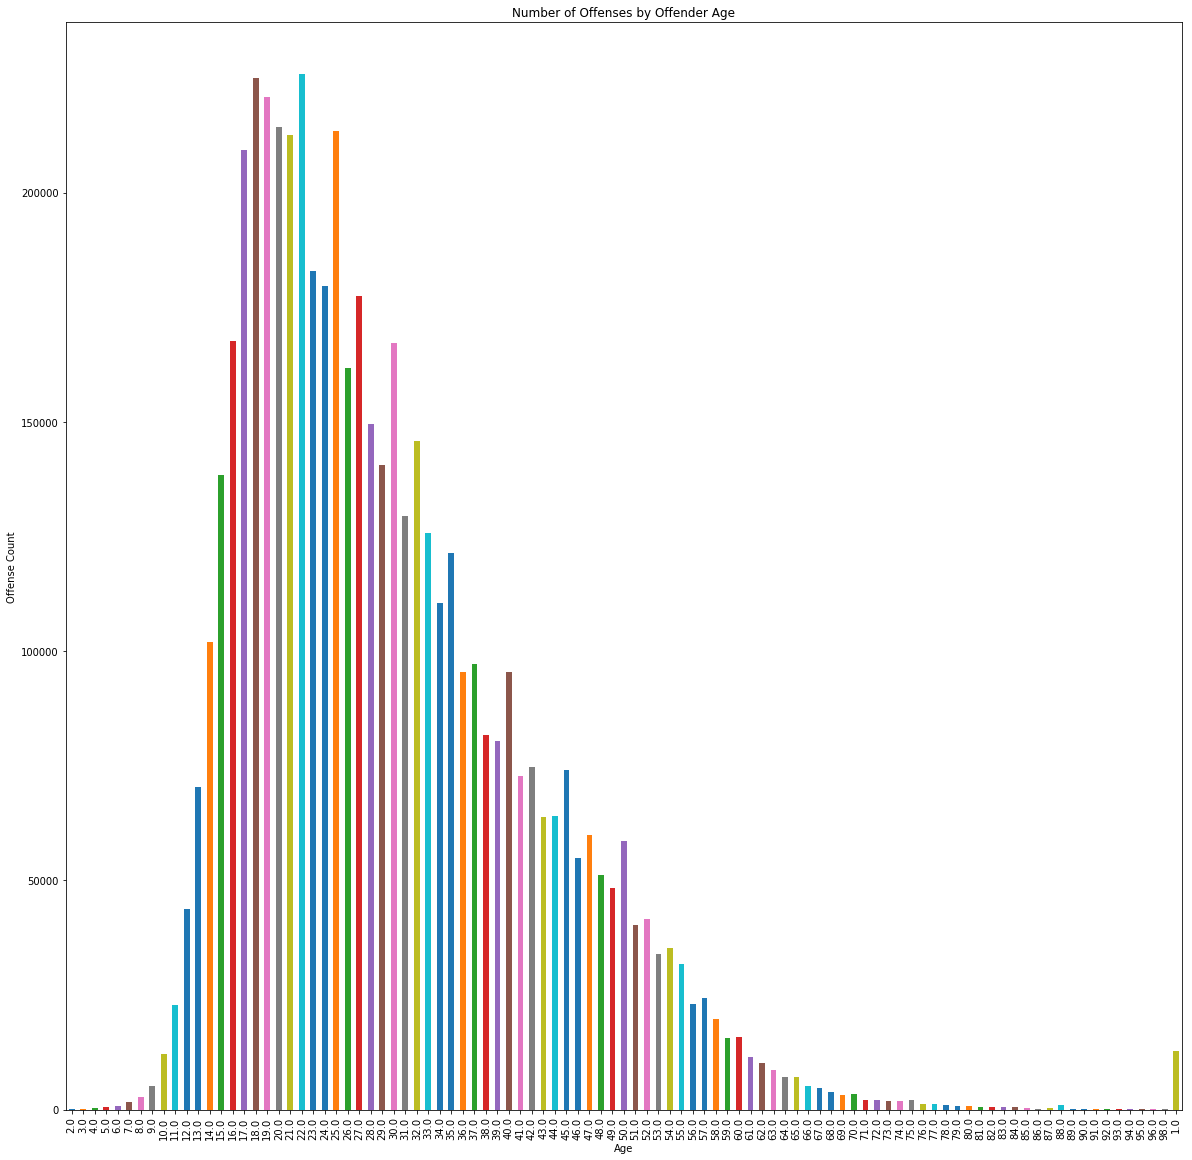

In [79]:
import matplotlib.pyplot as plt

OffAges.plot.bar(figsize = (20,20))
plt.title('Number of Offenses by Offender Age')
plt.xlabel('Age')
plt.ylabel('Offense Count')
plt.show()

# Plot Victim Count by Gender and County

In [10]:
small_df = Vic_Off_df[['victim_sex','fips']]

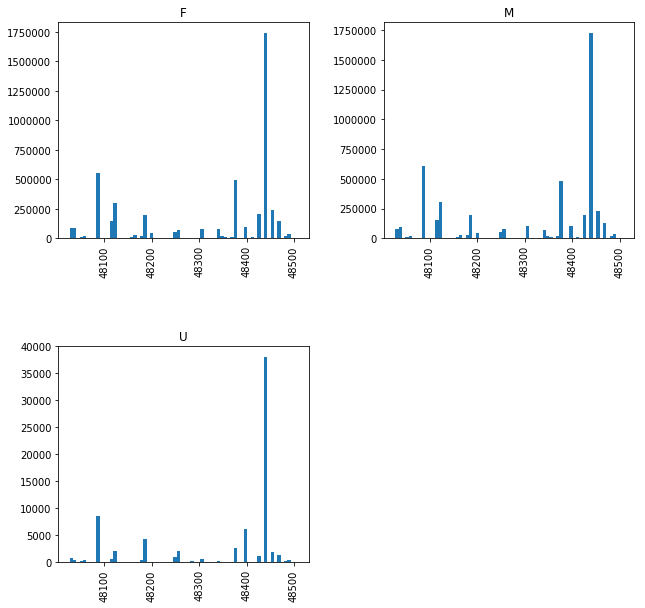

In [81]:
pd.DataFrame.hist(small_df, by=small_df['victim_sex'], figsize= (10,10), bins = len(small_df.fips.unique()))
plt.xlabel('FIPS')
plt.ylabel('Victim Count')
plt.show()

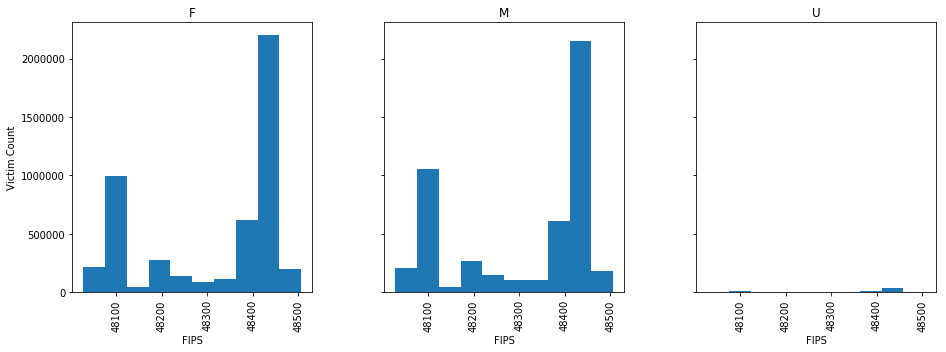

In [89]:
small_df.columns = ['victim_sex','fips']

axarr = small_df.hist(column='fips', by = 'victim_sex', sharex=True, sharey=True, layout = (1, 3), figsize=(15,5))

for ax in axarr.flatten():
    ax.set_xlabel("FIPS")
    ax.set_ylabel("Victim Count")

# Plot total number of victims by FIPS

In [91]:
FIPS_Vics = pd.value_counts(small_df['fips'].values, sort=True)
FIPS_Vics

48439    3508279
48085    1165046
48375     915733
48121     592872
48451     460663
48423     405671
48183     387933
48113     301854
48469     270963
48039     185122
48027     162897
48257     154490
48339     153202
48251     113705
48397     105574
48401      98686
48309      94066
48303      89488
48201      71120
48491      69986
48373      65436
48167      57084
48181      49278
48347      42581
48057      38710
48367      33673
48053      30954
48157      28800
48481      26523
48353      25500
          ...   
48073       7242
48175       6545
48285       6412
48231       5747
48029       3916
48411       3899
48457       3714
48299       3312
48233       3045
48215       2555
48507       2548
48259       2268
48497       1624
48245       1582
48489       1428
48099       1232
48281       1148
48043       1099
48381        819
48197        742
48277        735
48331        420
48357        392
48419        294
48313        245
48503        245
48427        231
48289        1

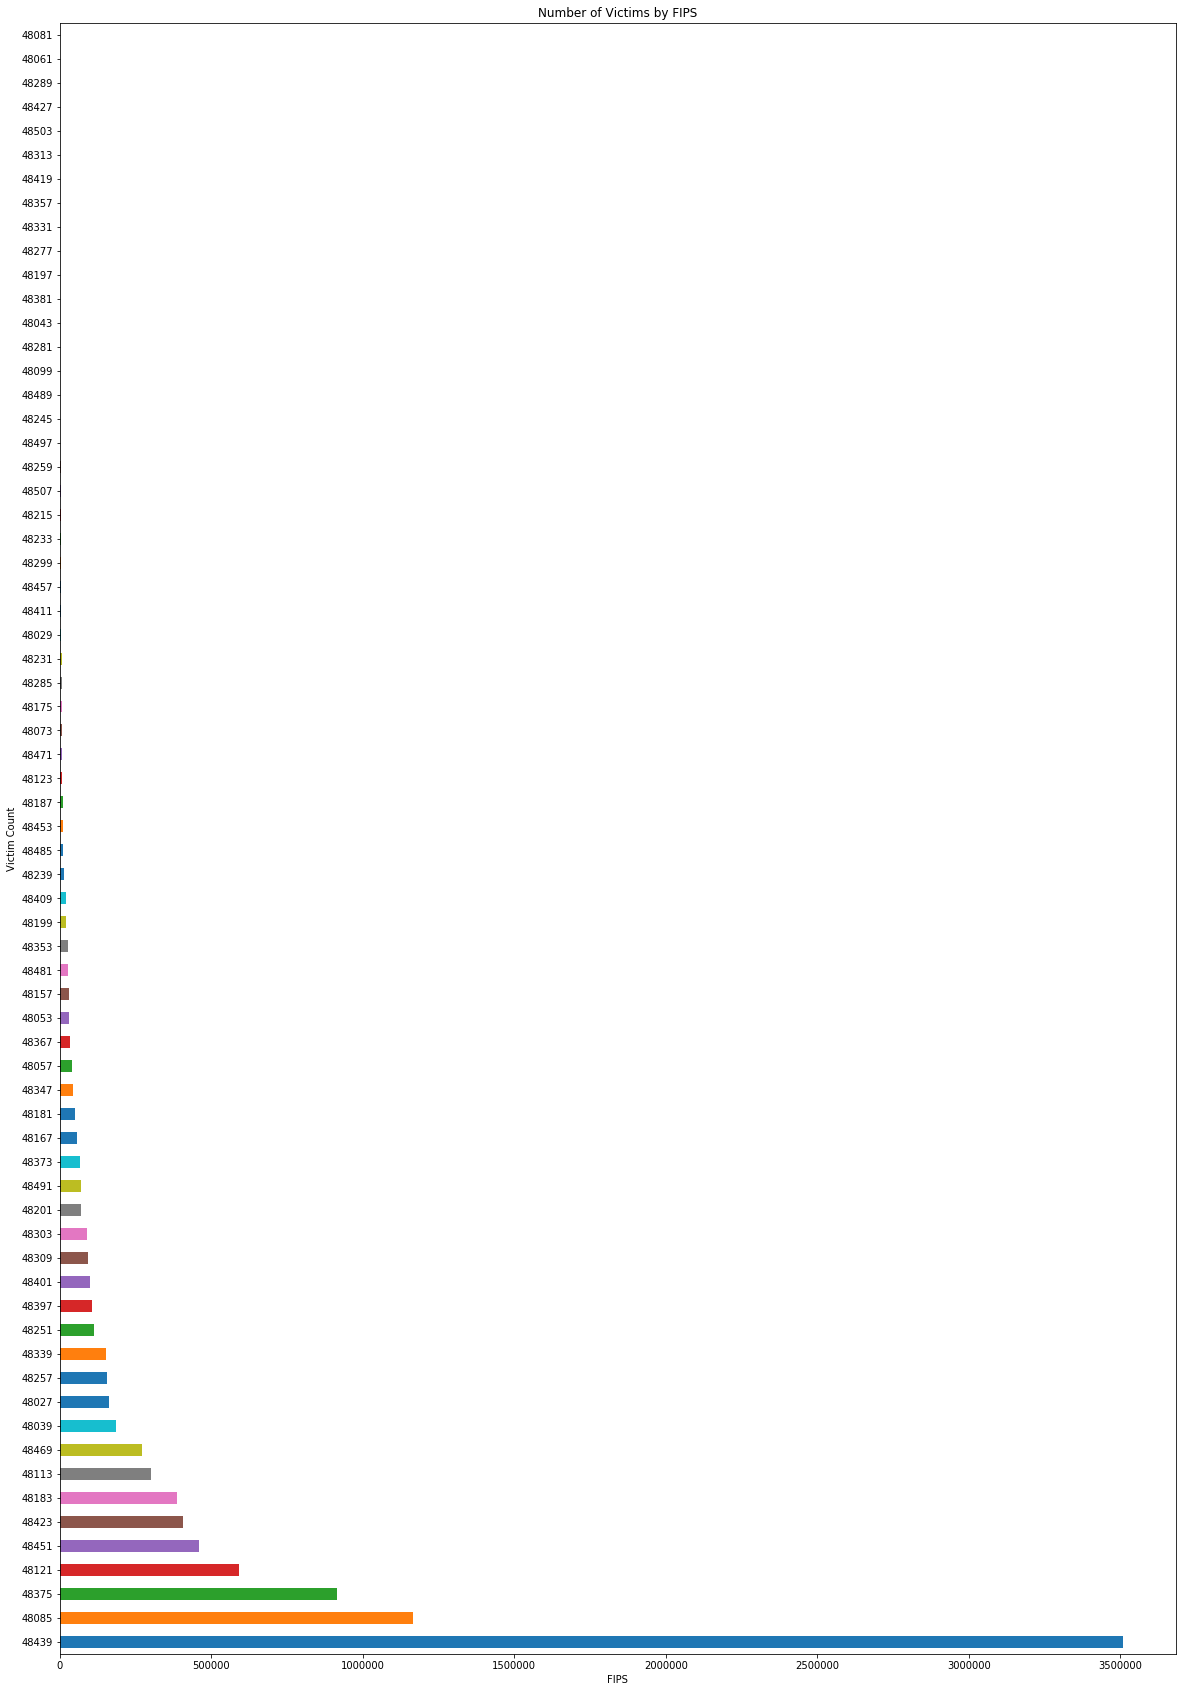

In [94]:
FIPS_Vics.plot.barh(figsize = (20,30))
plt.title('Number of Victims by FIPS')
plt.xlabel('FIPS')
plt.ylabel('Victim Count')
plt.show()

### Look at agency participation

In [16]:
agency_part_query = "SELECT * FROM agency_participation;"

agency_part_df = pd.read_sql(agency_part_query, con=conn)

In [17]:
agency_df.year.value_counts()

2016    2330
2015    2296
2014    2282
2013    1134
2012    1131
2011    1121
2010    1113
Name: year, dtype: int64

In [18]:
agency_query = "SELECT * FROM cde_agencies;"

agency_df = pd.read_sql(agency_query, con=conn)

In [31]:
agency_df.head(3).T

0  \
agency_id                                                             19027   
ori                                                               TX0572100   
legacy_ori                                                        TX0572100   
agency_name                                        Sachse Police Department   
short_name                                                           Sachse   
agency_type_id                                                            1   
agency_type_name                                                       City   
tribe_id                                                                NaN   
campus_id                                                               NaN   
city_id                                                               10730   
city_name                                                            Sachse   
state_id                                                                 48   
state_abbr                                                               TX   
primary_county_id                                                      2671   
primary_county                                                       Dallas   
primary_county_fips                                                   48113   
agency_status                                                             A   
submitting_agency_id                                                  23393   
submitting_sai                                                    TXUCR0001   
submitting_name           Texas Department of Public Safety Crime Inform...   
submitting_state_abbr                                                    TX   
start_year                                                             1985   
dormant_year                                                            NaN   
current_year                                                           2016   
revised_rape_start                                                     2013   
current_nibrs_start_year                                               2007   
population                                                            24564   
population_group_code                                                     5   
population_group_desc                        Cities from 10,000 thru 24,999   
population_source_flag                                                    L   
suburban_area_flag                                                        Y   
core_city_flag                                                            N   
months_reported                                                          12   
nibrs_months_reported                                                    12   
past_10_years_reported                                                   10   
covered_by_id                                                           NaN   
covered_by_ori                                                         None   
covered_by_name                                                        None   
staffing_year                                                          2016   
total_officers                                                           28   
total_civilians                                                          14   
icpsr_zip                                                             75048   
icpsr_lat                                                            32.767   
icpsr_lng                                                          -96.7784   

                                                                          1  \
agency_id                                                             19313   
ori                                                               TX1080500   
legacy_ori                                                        TX1080500   
agency_name                                          Elsa Police Department   
short_name                                                             Elsa   
agency_type_id                              

In [28]:
agency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6940 entries, 0 to 6939
Data columns (total 44 columns):
agency_id                   6940 non-null int64
ori                         6940 non-null object
legacy_ori                  6940 non-null object
agency_name                 6940 non-null object
short_name                  6940 non-null object
agency_type_id              6940 non-null int64
agency_type_name            6940 non-null object
tribe_id                    7 non-null float64
campus_id                   485 non-null float64
city_id                     4568 non-null float64
city_name                   4565 non-null object
state_id                    6940 non-null int64
state_abbr                  6940 non-null object
primary_county_id           6940 non-null int64
primary_county              6927 non-null object
primary_county_fips         6927 non-null object
agency_status               6940 non-null object
submitting_agency_id        6940 non-null int64
submitting_sai   

In [30]:
agency_df.head(3).T

0  \
agency_id                                                             19027   
ori                                                               TX0572100   
legacy_ori                                                        TX0572100   
agency_name                                        Sachse Police Department   
short_name                                                           Sachse   
agency_type_id                                                            1   
agency_type_name                                                       City   
tribe_id                                                                NaN   
campus_id                                                               NaN   
city_id                                                               10730   
city_name                                                            Sachse   
state_id                                                                 48   
state_abbr                                                               TX   
primary_county_id                                                      2671   
primary_county                                                       Dallas   
primary_county_fips                                                   48113   
agency_status                                                             A   
submitting_agency_id                                                  23393   
submitting_sai                                                    TXUCR0001   
submitting_name           Texas Department of Public Safety Crime Inform...   
submitting_state_abbr                                                    TX   
start_year                                                             1985   
dormant_year                                                            NaN   
current_year                                                           2016   
revised_rape_start                                                     2013   
current_nibrs_start_year                                               2007   
population                                                            24564   
population_group_code                                                     5   
population_group_desc                        Cities from 10,000 thru 24,999   
population_source_flag                                                    L   
suburban_area_flag                                                        Y   
core_city_flag                                                            N   
months_reported                                                          12   
nibrs_months_reported                                                    12   
past_10_years_reported                                                   10   
covered_by_id                                                           NaN   
covered_by_ori                                                         None   
covered_by_name                                                        None   
staffing_year                                                          2016   
total_officers                                                           28   
total_civilians                                                          14   
icpsr_zip                                                             75048   
icpsr_lat                                                            32.767   
icpsr_lng                                                          -96.7784   

                                                                          1  \
agency_id                                                             19313   
ori                                                               TX1080500   
legacy_ori                                                        TX1080500   
agency_name                                          Elsa Police Department   
short_name                                                             Elsa   
agency_type_id                              

In [34]:
df_2016 = pd.read_csv('init_2016.csv')
df_2016.head()

victim_id  incident_id  year  victim_type_id victim_type  age_range_low  \
0   95384706     87276968  2016               4  Individual           25.0   
1   95384706     87276968  2016               4  Individual           25.0   
2   95384706     87276968  2016               4  Individual           25.0   
3   95384706     87276968  2016               4  Individual           25.0   
4   95384706     87276968  2016               4  Individual           25.0   

   age_range_high victim_sex crime_against         offense  \
0             0.0          M      Property  Pocket-picking   
1             0.0          M      Property  Pocket-picking   
2             0.0          M      Property  Pocket-picking   
3             0.0          M      Property  Pocket-picking   
4             0.0          M      Property  Pocket-picking   

             ...            offense_group offender_id  offender_age  \
0            ...                        A    98477248           NaN   
1            ...                        A    98477248           NaN   
2            ...                        A    98477248           NaN   
3            ...                        A    98477248           NaN   
4            ...                        A    98477248           NaN   

   offender_sex location_id              location_name  \
0           NaN           8  Department/Discount Store   
1           NaN           8  Department/Discount Store   
2           NaN           8  Department/Discount Store   
3           NaN           8  Department/Discount Store   
4           NaN           8  Department/Discount Store   

                         doc_name   fips  county                  ori_name  
0  2016_01_TX0140700_16000156_INC  48027    BELL  TEMPLE POLICE DEPARTMENT  
1  2016_01_TX0140700_16000156_INC  48027    BELL  TEMPLE POLICE DEPARTMENT  
2  2016_01_TX0140700_16000156_INC  48027    BELL  TEMPLE POLICE DEPARTMENT  
3  2016_01_TX0140700_16000156_INC  48027    BELL  TEMPLE POLICE DEPARTMENT  
4  2016_01_TX0140700_16000156_INC  48027    BELL  TEMPLE POLICE DEPARTMENT  

[5 rows x 21 columns]

In [35]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353515 entries, 0 to 1353514
Data columns (total 21 columns):
victim_id           1353515 non-null int64
incident_id         1353515 non-null int64
year                1353515 non-null int64
victim_type_id      1353515 non-null int64
victim_type         1353515 non-null object
age_range_low       1321603 non-null float64
age_range_high      1321603 non-null float64
victim_sex          1353515 non-null object
crime_against       1353515 non-null object
offense             1353515 non-null object
offense_category    1353515 non-null object
offense_group       1353515 non-null object
offender_id         1353515 non-null int64
offender_age        731612 non-null float64
offender_sex        1028947 non-null object
location_id         1353515 non-null int64
location_name       1353515 non-null object
doc_name            1353515 non-null object
fips                1353515 non-null int64
county              1353515 non-null object
ori_name    

In [36]:
df_2016.corr()

victim_id  incident_id  year  victim_type_id  age_range_low  \
victim_id        1.000000     0.999995   NaN             NaN       0.002099   
incident_id      0.999995     1.000000   NaN             NaN       0.002131   
year                  NaN          NaN   NaN             NaN            NaN   
victim_type_id        NaN          NaN   NaN             NaN            NaN   
age_range_low    0.002099     0.002131   NaN             NaN       1.000000   
age_range_high   0.003555     0.003562   NaN             NaN      -0.036722   
offender_id      0.999996     0.999999   NaN             NaN       0.002140   
offender_age     0.016092     0.016140   NaN             NaN       0.284103   
location_id     -0.000448    -0.000446   NaN             NaN      -0.033257   
fips            -0.021333    -0.021048   NaN             NaN      -0.015095   

                age_range_high  offender_id  offender_age  location_id  \
victim_id             0.003555     0.999996      0.016092    -0.000448   
incident_id           0.003562     0.999999      0.016140    -0.000446   
year                       NaN          NaN           NaN          NaN   
victim_type_id             NaN          NaN           NaN          NaN   
age_range_low        -0.036722     0.002140      0.284103    -0.033257   
age_range_high        1.000000     0.003574     -0.004259    -0.003072   
offender_id           0.003574     1.000000      0.016132    -0.000453   
offender_age         -0.004259     0.016132      1.000000    -0.055057   
location_id          -0.003072    -0.000453     -0.055057     1.000000   
fips                 -0.011174    -0.021308      0.014825    -0.022081   

                    fips  
victim_id      -0.021333  
incident_id    -0.021048  
year                 NaN  
victim_type_id       NaN  
age_range_low  -0.015095  
age_range_high -0.011174  
offender_id    -0.021308  
offender_age    0.014825  
location_id    -0.022081  
fips            1.000000

In [37]:
df_2016.isna().sum()

victim_id                0
incident_id              0
year                     0
victim_type_id           0
victim_type              0
age_range_low        31912
age_range_high       31912
victim_sex               0
crime_against            0
offense                  0
offense_category         0
offense_group            0
offender_id              0
offender_age        621903
offender_sex        324568
location_id              0
location_name            0
doc_name                 0
fips                     0
county                   0
ori_name                 0
dtype: int64

In [38]:
df_2016['offender_sex'].fillna('U', inplace=True)

In [39]:
df_2016.isna().sum()

victim_id                0
incident_id              0
year                     0
victim_type_id           0
victim_type              0
age_range_low        31912
age_range_high       31912
victim_sex               0
crime_against            0
offense                  0
offense_category         0
offense_group            0
offender_id              0
offender_age        621903
offender_sex             0
location_id              0
location_name            0
doc_name                 0
fips                     0
county                   0
ori_name                 0
dtype: int64

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
X = vectorizer.fit_transform(article_df['content'])

In [ ]:
kmeans = KMeans(n_clusters=8, init = 'k-means++', random_state=0).fit(X)

In [ ]:
feat_names = vectorizer.get_feature_names()

In [ ]:
labels = kmeans.labels_
labels

In [ ]:
K_centers = kmeans.cluster_centers_